In [30]:
# importing libraies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Wordcloud
from wordcloud import WordCloud
import seaborn as sns 
sns.set_theme(style="whitegrid")
sns.dark_palette((20, 60, 50), input="husl")
# import interactive libraries
import ipywidgets
# library to create sankey charts.
from pySankey.sankey import sankey 
# Library to ignore warning 
import warnings                     # enable this once the code is finalized.
warnings.filterwarnings("ignore")
# Os library is imported to work with files 
import os

setting the row and column count

In [31]:
# Set display.max_rows to increase the row limit
pd.set_option('display.max_rows', 100)  # Change 100 to the desired row limit

# Set display.max_columns to increase the column limit
pd.set_option('display.max_columns', 50)  # Change 50 to the desired column limit

Importing data
 
 --> here we are importing the data about donors and receivers

In [32]:
# Importing donors data as a dataframe: 
donordata = pd.read_csv(r"C:\Users\lavud\Documents\Careerpedia Advanced\EDA_COMMENTS\donor_data.csv")

In [33]:
reciverdata = pd.read_csv(r"C:\Users\lavud\Documents\Careerpedia Advanced\EDA_COMMENTS\reciver_data.csv")

the bank codes details have been extracted from tis website

--> All the bank branches don't have the authority to issue electoral bonds only few bramnches of SBI banks can issue them and this table contains the details of that bank and based on the branch code we can connect to the reciver and donor data
 

In [36]:
# Importing bank details.bankdata =
bankdata =  pd.read_table(r"C:\Users\lavud\Documents\Careerpedia Advanced\EDA_COMMENTS\Bankcodes.tsv")

peeking into bankdata

In [37]:
bankdata.head()

,Sl.No.,State/UT,Name of the Branch & Address,City,Branch Code No.,Issue Code
0,1,Delhi,"Delhi Main Branch 11, Parliament Street, New D...",New Delhi,691,691
1,2,Haryana,"Chandigarh Main Branch SCO 43-48, Banking Squa...",Chandigarh,628,628
2,3,Punjab,"Chandigarh Main Branch SCO 43-48, Banking Squa...",Chandigarh,628,628
3,4,Chandigarh,"Chandigarh Main Branch SCO 43-48, Banking Squa...",Chandigarh,628,628
4,5,Himachal Pradesh,"Shimla Main BranchNear Kali Bari Temple, The M...",Shimla,718,718


In [38]:
bankdata.columns

Index(['Sl.No.', 'State/UT', 'Name of the Branch & Address', 'City',
       'Branch Code No.', 'Issue Code'],
      dtype='object')

In [42]:
bankdata.shape

(35, 5)

In [43]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State/UT                      35 non-null     object
 1   Name of the Branch & Address  35 non-null     object
 2   City                          35 non-null     object
 3   Branch Code No.               35 non-null     int64 
 4   Issue Code                    35 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [44]:
bankdata['Branch Code No.'].count()

print(f"There are total 29 banks who can issues electoral bonds.")

There are total 29 banks who can issues electoral bonds.


there are only 29  banks who can issue electoral bonds


adress is of not important or we dont have any plans to use it inn the analysis. i am removing  the columns so that my dataframe is slick and my joins will concise.



In [46]:
# Drop Adress column bankdata
bankdata.drop('Name of the Branch & Address',axis=1,inplace=True)

In [49]:
bankdata['State/UT'] = bankdata['State/UT'].str.strip()
bankdata['City'] = bankdata['City'].str.strip()

In [40]:
bankdata.drop(['Sl.No.'],axis=1,inplace=True)

In [50]:
bankdata.head()

,State/UT,City,Branch Code No.,Issue Code
0,Delhi,New Delhi,691,691
1,Haryana,Chandigarh,628,628
2,Punjab,Chandigarh,628,628
3,Chandigarh,Chandigarh,628,628
4,Himachal Pradesh,Shimla,718,718


Looking into donors data setting data types

In [52]:
donordata.head()

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230
2,3,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11441,1000000,1,5899230
3,4,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1113,100000,1,5899230
4,5,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1118,100000,1,5899230


In [53]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller'],
      dtype='object')

In [55]:
donordata.shape

(18871, 11)

we have 18,871 Records in donor table

In [57]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SNo            18871 non-null  int64 
 1   Urn            18871 non-null  object
 2   JournalDate    18871 non-null  object
 3   PurchaseDate   18871 non-null  object
 4   ExpiryDate     18871 non-null  object
 5   Purchaser      18871 non-null  object
 6   Prefix         18871 non-null  object
 7   BondNumber     18871 non-null  int64 
 8   Denominations  18871 non-null  int64 
 9   PayBranchCode  18871 non-null  int64 
 10  PayTeller      18871 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.6+ MB


In [58]:
donordata['ExpiryDate'] = pd.to_datetime(donordata['ExpiryDate'])
donordata['JournalDate'] = pd.to_datetime(donordata['JournalDate'])
donordata['PurchaseDate'] = pd.to_datetime(donordata['PurchaseDate'])

In [59]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SNo            18871 non-null  int64         
 1   Urn            18871 non-null  object        
 2   JournalDate    18871 non-null  datetime64[ns]
 3   PurchaseDate   18871 non-null  datetime64[ns]
 4   ExpiryDate     18871 non-null  datetime64[ns]
 5   Purchaser      18871 non-null  object        
 6   Prefix         18871 non-null  object        
 7   BondNumber     18871 non-null  int64         
 8   Denominations  18871 non-null  int64         
 9   PayBranchCode  18871 non-null  int64         
 10  PayTeller      18871 non-null  int64         
dtypes: datetime64[ns](3), int64(5), object(3)
memory usage: 1.6+ MB


In [60]:
donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230


In [61]:
# Striping purchaser column --> cleaning the columns
donordata['Purchaser'] = donordata['Purchaser'].str.strip()

In [62]:
# Rename the columns to decrease the confusion on the columns names
donordata.rename(columns={'PayTeller':'IssueTeller'})

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,IssueTeller
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230
2,3,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11441,1000000,1,5899230
3,4,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1113,100000,1,5899230
4,5,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1118,100000,1,5899230
...,...,...,...,...,...,...,...,...,...,...,...
18866,18867,00001202401110000003729,2024-01-11,2024-01-11,2024-01-25,WESTWELL GASES PRIVATE LIMITED,OC,15695,10000000,1,5898161
18867,18868,00001202401110000003729,2024-01-11,2024-01-11,2024-01-25,WESTWELL GASES PRIVATE LIMITED,OC,15693,10000000,1,5898161
18868,18869,00001202401110000003729,2024-01-11,2024-01-11,2024-01-25,WESTWELL GASES PRIVATE LIMITED,OC,15697,10000000,1,5898161
18869,18870,00001202401110000003729,2024-01-11,2024-01-11,2024-01-25,WESTWELL GASES PRIVATE LIMITED,OC,17803,10000000,1,5898161


In [63]:
donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230


In [68]:
donordata_df = pd.merge(donordata,
                        bankdata,
                        how= "inner",
                        left_on= "PayBranchCode",
                        right_on= "Branch Code No.")

In [71]:
donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230


In [72]:
donordata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'State/UT', 'City', 'Branch Code No.', 'Issue Code'],
      dtype='object')

creating composite key

  --> we are creating a composite key which is a combination of prefix and Bondnumber which act as a primary and will be the commom column in donor and reciver table.

  the prefix column and bondnumber column combination  acts as unique for a bond.  these columns are common in both donor and recivers table. so we are creating this columns in both the tables and we can join it or make connection for who paid for each party. 

In [73]:
# Creating a commong Key to connect Donors and recivers data
donordata['unique_key'] = donordata['Prefix'].astype(str) + donordata['BondNumber'].astype(str) 
donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller,unique_key
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,TL11448
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,TL11447


In [74]:
donordata.rename(columns={'PayTeller':'IssueTeller'},inplace=True)

In [76]:
donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,IssueTeller,unique_key
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,TL11448
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,TL11447


In [77]:
donordata.shape

(18871, 12)

In [78]:
Total_amt_spent = donordata['Denominations'].sum()

print(f"The total amount spent by donor to fund political parities is {Total_amt_spent}")

The total amount spent by donor to fund political parities is 121555132000


peeking into recivers data

In [81]:
reciverdata.head()

,Sno,DateEncashment,PartyName,AccountNum,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller
0,1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121
1,2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,10000000,800,2770121
2,3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3967,10000000,800,2770121
3,4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,10418,1000000,800,2770121
4,5,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,126,1000000,800,2770121


In [82]:
reciverdata.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller'],
      dtype='object')

In [83]:
reciverdata.shape

(20421, 9)

In [84]:
reciverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             20421 non-null  int64 
 1   DateEncashment  20421 non-null  object
 2   PartyName       20421 non-null  object
 3   AccountNum      20421 non-null  object
 4   Prefix          20421 non-null  object
 5   BondNumber      20421 non-null  int64 
 6   Denominations   20421 non-null  int64 
 7   PayBranchCode   20421 non-null  int64 
 8   PayTeller       20421 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


In [85]:
# Changing the datatype to date time. 
reciverdata['DateEncashment'] = pd.to_datetime(reciverdata['DateEncashment'])

In [86]:
# creating a new column for year of enchasment 
reciverdata['encashedyear'] = reciverdata['DateEncashment'].dt.year

In [87]:
# Joining with bank data
reciver_df = pd.merge(reciverdata,
                      bankdata,
                      left_on='PayBranchCode',
                      right_on='Branch Code No.',
                      how='inner')

In [93]:
reciver_df.head(3)

,Sno,DateEncashment,PartyName,AccountNum,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller,encashedyear,State/UT,City,Branch Code No.,Issue Code
0,1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121,2019,Puducherry,Chennai,800,800
1,1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121,2019,Tamil Nadu,Chennai,800,800
2,2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,10000000,800,2770121,2019,Puducherry,Chennai,800,800


In [89]:
reciver_df.shape

(24518, 14)

In [90]:
reciverdata['PartyName'] = reciverdata['PartyName'].str.strip()

In [100]:
reciverdata['unique_key'] = reciverdata['Prefix'].astype(str) + reciverdata['BondNumber'].astype(str) 
donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,IssueTeller,unique_key
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,TL11448
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,TL11447


In [91]:
Total_received_amt = reciverdata['Denominations'].sum()
print(f"The total amount recived by political parities is {Total_received_amt}")

The total amount recived by political parities is 127690893000


In [94]:
print(f"Total donated amount {Total_amt_spent}")
print(f"Total recived amount {Total_received_amt}")

print("""if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. \n""")

print(f"The total unacountable money recived by political parties is {Total_received_amt - Total_amt_spent}")

Total donated amount 121555132000
Total recived amount 127690893000
if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. 

The total unacountable money recived by political parties is 6135761000


In [99]:
reciverdata.columns


Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear'],
      dtype='object')

Mergind data

In [101]:
print(f"The number of records in donar Table is {donordata['unique_key'].count()}")
print(f"The number of records in reciver Table is {reciverdata['unique_key'].count()}")

The number of records in donar Table is 18871
The number of records in reciver Table is 20421


the row count is way larger than the donors and recivers data so that means there are records in reciver tabke without any corresponding donors and may be even donor without any corresponding political party.  

Merging data to get insights :

In [105]:
# Merging the data with outer join.
alldata_df = pd.merge(donordata, reciverdata, on='unique_key', how='outer')
alldata_df.head()

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix_x,BondNumber_x,Denominations_x,PayBranchCode_x,IssueTeller,unique_key,Sno,DateEncashment,PartyName,AccountNum,Prefix_y,BondNumber_y,Denominations_y,PayBranchCode_y,PayTeller,encashedyear
0,1.0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448.0,1000000.0,1.0,5899230.0,TL11448,2766.0,2019-04-25,BHARATIYA JANATA PARTY,*******8244,TL,11448.0,1000000.0,691.0,3300196.0,2019.0
1,2.0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447.0,1000000.0,1.0,5899230.0,TL11447,2767.0,2019-04-25,BHARATIYA JANATA PARTY,*******8244,TL,11447.0,1000000.0,691.0,3300196.0,2019.0
2,3.0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11441.0,1000000.0,1.0,5899230.0,TL11441,2768.0,2019-04-25,BHARATIYA JANATA PARTY,*******8244,TL,11441.0,1000000.0,691.0,3300196.0,2019.0
3,4.0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1113.0,100000.0,1.0,5899230.0,OL1113,2807.0,2019-04-25,BHARATIYA JANATA PARTY,*******8244,OL,1113.0,100000.0,691.0,3300196.0,2019.0
4,5.0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1118.0,100000.0,1.0,5899230.0,OL1118,2808.0,2019-04-25,BHARATIYA JANATA PARTY,*******8244,OL,1118.0,100000.0,691.0,3300196.0,2019.0


In [107]:
alldata_df.isnull().sum()

SNo                1680
Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix_x           1680
BondNumber_x       1680
Denominations_x    1680
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
Sno                 130
DateEncashment      130
PartyName           130
AccountNum          130
Prefix_y            130
BondNumber_y        130
Denominations_y     130
PayBranchCode_y     130
PayTeller           130
encashedyear        130
dtype: int64

In [108]:
alldata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'PayBranchCode_x',
       'IssueTeller', 'unique_key', 'Sno', 'DateEncashment', 'PartyName',
       'AccountNum', 'Prefix_y', 'BondNumber_y', 'Denominations_y',
       'PayBranchCode_y', 'PayTeller', 'encashedyear'],
      dtype='object')

In [109]:
alldata_df['Denomination'] = alldata_df['Denominations_x'].fillna(alldata_df['Denominations_y'])

In [110]:
alldata_df.isnull().sum()

SNo                1680
Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix_x           1680
BondNumber_x       1680
Denominations_x    1680
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
Sno                 130
DateEncashment      130
PartyName           130
AccountNum          130
Prefix_y            130
BondNumber_y        130
Denominations_y     130
PayBranchCode_y     130
PayTeller           130
encashedyear        130
Denomination          0
dtype: int64

> Out of these columns some of them are redundant.

In [111]:
# Fill missing values in 'Prefix_x' with corresponding values from 'Prefix_y'
alldata_df['Prefix_x'].fillna(alldata_df['Prefix_y'], inplace=True)

# Fill missing values in 'BondNumber_x' with corresponding values from 'BondNumber_y'
alldata_df['BondNumber_x'].fillna(alldata_df['BondNumber_y'], inplace=True)

In [112]:
alldata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'PayBranchCode_x',
       'IssueTeller', 'unique_key', 'Sno', 'DateEncashment', 'PartyName',
       'AccountNum', 'Prefix_y', 'BondNumber_y', 'Denominations_y',
       'PayBranchCode_y', 'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [113]:
alldata_df.drop(['SNo','Sno','Prefix_y', 'BondNumber_y', 'Denominations_y','Denominations_x'],axis=1,inplace=True)

In [114]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'PayBranchCode_x', 'IssueTeller',
       'unique_key', 'DateEncashment', 'PartyName', 'AccountNum',
       'PayBranchCode_y', 'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [115]:
alldata_df.rename(columns={'Prefix_x':'Prefix', 
                           'BondNumber_x':'BondNumber', 
                           #'Denominations_x':'Denomination',
                           'State_x':'IssueState', 
                           'Branch Code No._x':'IssueBranchCodeNo', 
                           'Branch City_x':'IssueBranchCity',
                           'State_y':'EncashedState', 
                           'Branch Code No._y':'EncashedBranchCode',
                           'Branch City_y':'EncashedCity'}, 
                  inplace=True)

In [116]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [117]:
alldata_df.head(2)

,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,PayBranchCode_x,IssueTeller,unique_key,DateEncashment,PartyName,AccountNum,PayBranchCode_y,PayTeller,encashedyear,Denomination
0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448.0,1.0,5899230.0,TL11448,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0
1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447.0,1.0,5899230.0,TL11447,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0


In [118]:
alldata_df.isnull().sum()

Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix                0
BondNumber            0
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
DateEncashment      130
PartyName           130
AccountNum          130
PayBranchCode_y     130
PayTeller           130
encashedyear        130
Denomination          0
dtype: int64

In [119]:
# Listing elements which don't have purchaser (Donor) and PartyName. 
allnulls_df = pd.DataFrame(alldata_df.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

,Missing Rows Count
Purchaser,1680
PartyName,130


#### Conclusion 

**Looking into the above null count**
- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

In [120]:
alldata_df.shape

(20551, 17)

In [121]:
perfect_data = alldata_df.dropna(subset=['Purchaser','PartyName'])

In [122]:
perfect_data.head()

,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,PayBranchCode_x,IssueTeller,unique_key,DateEncashment,PartyName,AccountNum,PayBranchCode_y,PayTeller,encashedyear,Denomination
0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448.0,1.0,5899230.0,TL11448,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0
1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447.0,1.0,5899230.0,TL11447,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0
2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11441.0,1.0,5899230.0,TL11441,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0
3,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1113.0,1.0,5899230.0,OL1113,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,100000.0
4,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,OL,1118.0,1.0,5899230.0,OL1118,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,100000.0


In [123]:
perfect_data.shape

(18741, 17)

In [124]:
# Count nulls in each column
perfect_data.isnull().sum()

Urn                0
JournalDate        0
PurchaseDate       0
ExpiryDate         0
Purchaser          0
Prefix             0
BondNumber         0
PayBranchCode_x    0
IssueTeller        0
unique_key         0
DateEncashment     0
PartyName          0
AccountNum         0
PayBranchCode_y    0
PayTeller          0
encashedyear       0
Denomination       0
dtype: int64

#### Note: 

- We have 2 dataframes one has all columns data with null values rows $\rightarrow$ alldata_df
- The other data frame has all columns data with no null colums $\rightarrow$ perfect_data

# Final Cleaned Data 

- Here you can see the final cleaned Tables and column names. for each table. 

In [126]:

donordata.head(2)

,SNo,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,Denominations,PayBranchCode,IssueTeller,unique_key
0,1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,TL11448
1,2,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,TL11447


In [127]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'IssueTeller',
       'unique_key'],
      dtype='object')

In [128]:
donordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SNo            18871 non-null  int64         
 1   Urn            18871 non-null  object        
 2   JournalDate    18871 non-null  datetime64[ns]
 3   PurchaseDate   18871 non-null  datetime64[ns]
 4   ExpiryDate     18871 non-null  datetime64[ns]
 5   Purchaser      18871 non-null  object        
 6   Prefix         18871 non-null  object        
 7   BondNumber     18871 non-null  int64         
 8   Denominations  18871 non-null  int64         
 9   PayBranchCode  18871 non-null  int64         
 10  IssueTeller    18871 non-null  int64         
 11  unique_key     18871 non-null  object        
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 1.7+ MB


In [129]:
# Creating a purchase year column in donors dataframe 
donordata['PurchaserYear'] = donordata['PurchaseDate'].dt.year

In [130]:
reciverdata.head(2)

,Sno,DateEncashment,PartyName,AccountNum,Prefix,BondNumber,Denominations,PayBranchCode,PayTeller,encashedyear,unique_key
0,1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121,2019,OC775
1,2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,10000000,800,2770121,2019,OC3975


In [131]:
reciverdata.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'unique_key'],
      dtype='object')

In [132]:
reciverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sno             20421 non-null  int64         
 1   DateEncashment  20421 non-null  datetime64[ns]
 2   PartyName       20421 non-null  object        
 3   AccountNum      20421 non-null  object        
 4   Prefix          20421 non-null  object        
 5   BondNumber      20421 non-null  int64         
 6   Denominations   20421 non-null  int64         
 7   PayBranchCode   20421 non-null  int64         
 8   PayTeller       20421 non-null  int64         
 9   encashedyear    20421 non-null  int32         
 10  unique_key      20421 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 1.6+ MB


In [133]:
bankdata.head(2)

,State/UT,City,Branch Code No.,Issue Code
0,Delhi,New Delhi,691,691
1,Haryana,Chandigarh,628,628


In [134]:
bankdata.columns

Index(['State/UT', 'City', 'Branch Code No.', 'Issue Code'], dtype='object')

In [136]:
perfect_data.head(2)

,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,PayBranchCode_x,IssueTeller,unique_key,DateEncashment,PartyName,AccountNum,PayBranchCode_y,PayTeller,encashedyear,Denomination
0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448.0,1.0,5899230.0,TL11448,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0
1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447.0,1.0,5899230.0,TL11447,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0


In [137]:
perfect_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [138]:
perfect_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18870
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Urn              18741 non-null  object        
 1   JournalDate      18741 non-null  datetime64[ns]
 2   PurchaseDate     18741 non-null  datetime64[ns]
 3   ExpiryDate       18741 non-null  datetime64[ns]
 4   Purchaser        18741 non-null  object        
 5   Prefix           18741 non-null  object        
 6   BondNumber       18741 non-null  float64       
 7   PayBranchCode_x  18741 non-null  float64       
 8   IssueTeller      18741 non-null  float64       
 9   unique_key       18741 non-null  object        
 10  DateEncashment   18741 non-null  datetime64[ns]
 11  PartyName        18741 non-null  object        
 12  AccountNum       18741 non-null  object        
 13  PayBranchCode_y  18741 non-null  float64       
 14  PayTeller        18741 non-null  float64   

In [139]:
alldata_df.head(2)

,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,PayBranchCode_x,IssueTeller,unique_key,DateEncashment,PartyName,AccountNum,PayBranchCode_y,PayTeller,encashedyear,Denomination
0,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11448.0,1.0,5899230.0,TL11448,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0
1,00001201904120000001166,2019-04-12,2019-04-12,2019-04-26,A B C INDIA LIMITED,TL,11447.0,1.0,5899230.0,TL11447,2019-04-25,BHARATIYA JANATA PARTY,*******8244,691.0,3300196.0,2019.0,1000000.0


In [140]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [141]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Urn              18871 non-null  object        
 1   JournalDate      18871 non-null  datetime64[ns]
 2   PurchaseDate     18871 non-null  datetime64[ns]
 3   ExpiryDate       18871 non-null  datetime64[ns]
 4   Purchaser        18871 non-null  object        
 5   Prefix           20551 non-null  object        
 6   BondNumber       20551 non-null  float64       
 7   PayBranchCode_x  18871 non-null  float64       
 8   IssueTeller      18871 non-null  float64       
 9   unique_key       20551 non-null  object        
 10  DateEncashment   20421 non-null  datetime64[ns]
 11  PartyName        20421 non-null  object        
 12  AccountNum       20421 non-null  object        
 13  PayBranchCode_y  20421 non-null  float64       
 14  PayTeller        20421 non-null  float

##### Amount of money got donated but not claimed by political parties 

In [142]:
PM_fund = alldata_df.loc[alldata_df['PartyName'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has bean transfered to PM fund {PM_fund}")

This is the amount that has bean transfered to PM fund 96349000.0


##### Number of bonds donated but not claimed by political parties 

In [143]:
PM_fund_bonds = alldata_df.loc[alldata_df['PartyName'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has bean transfered to PM fund {PM_fund_bonds}")

This is the number of bonds that has bean transfered to PM fund 130


##### What is the average value of the bond that has no political party associated

In [144]:
PM_fund/PM_fund_bonds

741146.1538461539

##### Amount of money claimed by political parties without donors. 

In [145]:
black_amount = alldata_df.loc[alldata_df['Purchaser'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has no donor names which can be considered as black money an that amount is {black_amount}")

This is the amount that has no donor names which can be considered as black money an that amount is 6232110000.0


##### Number of bonds claimed by political parties without donors.

In [146]:
black_bonds = alldata_df.loc[alldata_df['Purchaser'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has no donor names which can be considered as black bonds an that  count is {black_bonds}")

This is the number of bonds that has no donor names which can be considered as black bonds an that  count is 1680


##### What is the average value of the bond which has no donor associated with

In [147]:
black_amount/black_bonds

3709589.285714286

##### How many bonds don't have Purchaser and PartyNames

In [148]:
# Listing elements which don't have purchaser (Donor) and PartyName. 
allnulls_df = pd.DataFrame(alldata_df.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

,Missing Rows Count
Purchaser,1680
PartyName,130


#### Conclusion 

**Looking into the above null count**
- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

#### Analysis of Nulls (Purchaser and PartyName)

In [149]:
#### Here is a diagram trying to show different dataframes we have created. 

![dataframe diagram](img/dataframe.png)

> Note: In the above diagram boxes that are filled has data and empty means NULLS

SyntaxError: invalid syntax (1562574901.py, line 5)

In [150]:
unredeemed_bonds_df = alldata_df[alldata_df['PartyName'].isnull()]
unredeemed_bonds_df.head(2)

,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,PayBranchCode_x,IssueTeller,unique_key,DateEncashment,PartyName,AccountNum,PayBranchCode_y,PayTeller,encashedyear,Denomination
443,00300201904150000001198,2019-04-15,2019-04-15,2019-04-29,UTKAL ALUMINA INTERNATIONAL LIMITED,TL,12858.0,300.0,4180496.0,TL12858,NaT,NaN,NaN,NaN,NaN,NaN,1000000.0
444,00300201904150000001198,2019-04-15,2019-04-15,2019-04-29,UTKAL ALUMINA INTERNATIONAL LIMITED,TL,12856.0,300.0,4180496.0,TL12856,NaT,NaN,NaN,NaN,NaN,NaN,1000000.0


In [151]:
unredeemed_bonds_analysis_df = unredeemed_bonds_df.groupby('Purchaser').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        #'Denomination_count': ('Denomination', 'count'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('Purchaser', 'count')
    }
).reset_index()

unredeemed_bonds_analysis_df

,Purchaser,Denomination_min,Denomination_max,Denomination_sum,Denomination_avg,Bond_count
0,ADWITA FINVEST PRIVATE LIMITED,1000.0,1000.0,1000.0,1.000000e+03,1
1,ANAND AGRAWAL,1000.0,10000.0,25000.0,3.571429e+03,7
2,ANKUR SINGHAL S O SH ANIL SIN,1000.0,1000.0,1000.0,1.000000e+03,1
3,BRINDABAN NASKAR,100000.0,100000.0,500000.0,1.000000e+05,5
4,C MACKERTICH PVT LTD,1000000.0,1000000.0,4000000.0,1.000000e+06,4
5,CHENNAMANAGATHIHALLI SOLAR POWER PROJECT,100000.0,100000.0,600000.0,1.000000e+05,6
6,DAMINI NATH,1000.0,1000.0,1000.0,1.000000e+03,1
7,DIPAN P SHAH,100000.0,100000.0,300000.0,1.000000e+05,3
8,ECL FINANCE LTD,1000000.0,1000000.0,20000000.0,1.000000e+06,20
9,EDELWEISS RURAL CORPORATE SERVICE,1000000.0,1000000.0,10000000.0,1.000000e+06,10


In [152]:
unaccounted_bonds_df = alldata_df[alldata_df['Purchaser'].isnull()]
unaccounted_bonds_df.head(2)

,Urn,JournalDate,PurchaseDate,ExpiryDate,Purchaser,Prefix,BondNumber,PayBranchCode_x,IssueTeller,unique_key,DateEncashment,PartyName,AccountNum,PayBranchCode_y,PayTeller,encashedyear,Denomination
18871,NaN,NaT,NaT,NaT,NaN,OC,775.0,NaN,NaN,OC775,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,800.0,2770121.0,2019.0,10000000.0
18872,NaN,NaT,NaT,NaT,NaN,OC,3975.0,NaN,NaN,OC3975,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,800.0,2770121.0,2019.0,10000000.0


In [153]:
unaccounted_bonds_df.shape

(1680, 17)

In [154]:
unaccounted_bonds_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'PayBranchCode_x', 'IssueTeller', 'unique_key',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode_y',
       'PayTeller', 'encashedyear', 'Denomination'],
      dtype='object')

In [155]:
unaccounted_bonds_df.isnull().sum()

Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix                0
BondNumber            0
PayBranchCode_x    1680
IssueTeller        1680
unique_key            0
DateEncashment        0
PartyName             0
AccountNum            0
PayBranchCode_y       0
PayTeller             0
encashedyear          0
Denomination          0
dtype: int64

In [156]:
unaccounted_bonds_analysis_df = unaccounted_bonds_df.groupby('PartyName').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('PartyName', 'count')
    }
).reset_index()
unaccounted_bonds_analysis_df

,PartyName,Denomination_min,Denomination_max,Denomination_sum,Denomination_avg,Bond_count
0,AAM AADMI PARTY,1000000.0,1000000.0,2.000000e+06,1.000000e+06,2
1,ADYAKSHA SAMAJVADI PARTY,100000.0,1000000.0,8.400000e+06,2.800000e+05,30
2,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,100000.0,10000000.0,6.050000e+07,1.592105e+06,38
3,ALL INDIA TRINAMOOL CONGRESS,100000.0,10000000.0,1.701000e+08,4.725000e+06,36
4,BHARAT RASHTRA SAMITHI,100000.0,10000000.0,2.355000e+08,7.136364e+06,33
5,BHARATIYA JANATA PARTY,100000.0,10000000.0,4.663100e+09,4.072576e+06,1145
6,BIHAR PRADESH JANTA DAL(UNITED),10000000.0,10000000.0,2.000000e+07,1.000000e+07,2
7,DRAVIDA MUNNETRA KAZHAGAM (DMK),10000000.0,10000000.0,7.000000e+07,1.000000e+07,7
8,JANATA DAL ( SECULAR ),1000000.0,1000000.0,2.500000e+07,1.000000e+06,25
9,JHARKHAND MUKTI MORCHA,1000000.0,1000000.0,1.000000e+07,1.000000e+06,10


In [158]:
donordata.describe()

,SNo,JournalDate,PurchaseDate,ExpiryDate,BondNumber,Denominations,PayBranchCode,IssueTeller,PurchaserYear
count,18871.000000,18871,18871,18871,18871.000000,1.887100e+04,18871.000000,1.887100e+04,18871.000000
mean,9436.000000,2022-03-15 00:27:55.714058496,2022-03-15 00:28:27.763234304,2022-03-29 00:28:27.763234304,12181.003338,6.441372e+06,480.065550,5.895737e+06,2021.743734
min,1.000000,2019-04-12 00:00:00,2019-04-12 00:00:00,2019-04-26 00:00:00,8.000000,1.000000e+03,1.000000,1.013030e+06,2019.000000
25%,4718.500000,2021-04-09 00:00:00,2021-04-09 00:00:00,2021-04-23 00:00:00,8317.500000,1.000000e+06,1.000000,5.054982e+06,2021.000000
50%,9436.000000,2022-07-06 00:00:00,2022-07-06 00:00:00,2022-07-20 00:00:00,12350.000000,1.000000e+07,509.000000,6.405134e+06,2022.000000
75%,14153.500000,2023-07-10 00:00:00,2023-07-10 00:00:00,2023-07-24 00:00:00,14764.000000,1.000000e+07,813.000000,7.273126e+06,2023.000000
max,18871.000000,2024-01-11 00:00:00,2024-01-11 00:00:00,2024-01-25 00:00:00,71548.000000,1.000000e+07,1355.000000,8.492239e+06,2024.000000
std,5447.732801,NaN,NaN,NaN,6573.754865,4.538947e+06,395.446834,1.825395e+06,1.485145


In [159]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
donors_agg_df = donordata.groupby('Purchaser').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
donors_agg_df = donors_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
donors_agg_df

,Purchaser,Denominations_sum,Denominations_count,Denominations_min,Denominations_max,Denominations_mean
0,FUTURE GAMING AND HOTEL SERVICES PR,12080000000,1208,10000000,10000000,1.000000e+07
1,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,8210000000,821,10000000,10000000,1.000000e+07
2,QWIKSUPPLYCHAINPRIVATELIMITED,4100000000,410,10000000,10000000,1.000000e+07
3,HALDIA ENERGY LIMITED,3770000000,395,1000000,10000000,9.544304e+06
4,VEDANTA LIMITED,3756500000,386,100000,10000000,9.731865e+06
...,...,...,...,...,...,...
1311,POONAM AGARWAL,1000,1,1000,1000,1.000000e+03
1312,KUNAL GUPTA,1000,1,1000,1000,1.000000e+03
1313,N RAMAMOORTHY,1000,1,1000,1000,1.000000e+03
1314,ANKUR SINGHAL S O SH ANIL SIN,1000,1,1000,1000,1.000000e+03


In [160]:
donordata.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'PayBranchCode', 'IssueTeller',
       'unique_key', 'PurchaserYear'],
      dtype='object')

In [161]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
donors_agg_year_df = donordata.groupby(['Purchaser','PurchaserYear']).agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
donors_agg_year_df = donors_agg_year_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
donors_agg_year_df 

,Purchaser,PurchaserYear,Denominations_sum,Denominations_count,Denominations_min,Denominations_max,Denominations_mean
0,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,2023,4150000000,415,10000000,10000000,10000000.0
1,FUTURE GAMING AND HOTEL SERVICES PR,2022,4050000000,405,10000000,10000000,10000000.0
2,QWIKSUPPLYCHAINPRIVATELIMITED,2022,3600000000,360,10000000,10000000,10000000.0
3,FUTURE GAMING AND HOTEL SERVICES PR,2021,3340000000,334,10000000,10000000,10000000.0
4,FUTURE GAMING AND HOTEL SERVICES PR,2023,2560000000,256,10000000,10000000,10000000.0
...,...,...,...,...,...,...,...
1584,MR. SAMEER BHATIA,2023,1000,1,1000,1000,1000.0
1585,N RAMAMOORTHY,2021,1000,1,1000,1000,1000.0
1586,ANKUR SINGHAL S O SH ANIL SIN,2023,1000,1,1000,1000,1000.0
1587,POONAM AGARWAL,2020,1000,1,1000,1000,1000.0


In [162]:
reciverdata.describe()

,Sno,DateEncashment,BondNumber,Denominations,PayBranchCode,PayTeller,encashedyear
count,20421.000000,20421,20421.000000,2.042100e+04,20421.000000,2.042100e+04,20421.000000
mean,10211.000000,2021-12-23 18:57:25.041868800,11783.435140,6.252921e+06,559.467852,5.293055e+06,2021.520102
min,1.000000,2019-04-12 00:00:00,10.000000,1.000000e+03,1.000000,1.498450e+05,2019.000000
25%,5106.000000,2020-11-02 00:00:00,7797.000000,1.000000e+06,691.000000,3.490777e+06,2020.000000
50%,10211.000000,2022-04-11 00:00:00,11913.000000,1.000000e+07,691.000000,5.614473e+06,2022.000000
75%,15316.000000,2023-07-13 00:00:00,14585.000000,1.000000e+07,691.000000,7.516991e+06,2023.000000
max,20421.000000,2024-01-24 00:00:00,71548.000000,1.000000e+07,2295.000000,8.212066e+06,2024.000000
std,5895.179259,NaN,6525.685559,4.576321e+06,297.836567,1.953104e+06,1.606107


In [163]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
receiver_agg_df = reciverdata.groupby('PartyName').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
receiver_agg_df = receiver_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
receiver_agg_df

,PartyName,Denominations_sum,Denominations_count,Denominations_min,Denominations_max,Denominations_mean
0,BHARATIYA JANATA PARTY,60605111000,8633,1000,10000000,7.020168e+06
1,ALL INDIA TRINAMOOL CONGRESS,16095314000,3305,1000,10000000,4.869989e+06
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",14218655000,3146,1000,10000000,4.519598e+06
3,BHARAT RASHTRA SAMITHI,12147099000,1806,1000,10000000,6.725968e+06
4,BIJU JANATA DAL,7755000000,861,1000000,10000000,9.006969e+06
5,DRAVIDA MUNNETRA KAZHAGAM (DMK),6390000000,648,1000000,10000000,9.861111e+06
6,YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...,3370000000,472,100000,10000000,7.139831e+06
7,TELUGU DESAM PARTY,2188800000,279,100000,10000000,7.845161e+06
8,SHIVSENA,1593814000,355,1000,10000000,4.489617e+06
9,RASHTRIYA JANTA DAL,735000000,150,100000,10000000,4.900000e+06


In [164]:
reciverdata.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'unique_key'],
      dtype='object')

In [165]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
receiver_agg_year_df = reciverdata.groupby(['PartyName','encashedyear']).agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
receiver_agg_year_df = receiver_agg_year_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
receiver_agg_year_df

,PartyName,encashedyear,Denominations_sum,Denominations_count,Denominations_min,Denominations_max,Denominations_mean
0,BHARATIYA JANATA PARTY,2019,19717501000,3514,1000,10000000,5.611127e+06
1,BHARATIYA JANATA PARTY,2022,17635499000,2177,1000,10000000,8.100826e+06
2,BHARATIYA JANATA PARTY,2023,16763261000,2111,1000,10000000,7.940910e+06
3,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",2023,7933700000,1181,10000,10000000,6.717782e+06
4,ALL INDIA TRINAMOOL CONGRESS,2023,5624738000,1133,1000,10000000,4.964464e+06
5,BHARAT RASHTRA SAMITHI,2022,5289870000,660,10000,10000000,8.014955e+06
6,BHARAT RASHTRA SAMITHI,2023,4955700000,921,100000,10000000,5.380782e+06
7,ALL INDIA TRINAMOOL CONGRESS,2022,4688000000,638,100000,10000000,7.347962e+06
8,BHARATIYA JANATA PARTY,2021,3729950000,512,10000,10000000,7.285059e+06
9,ALL INDIA TRINAMOOL CONGRESS,2021,3309430000,913,10000,10000000,3.624786e+06


In [166]:
bankdata.describe()

,Branch Code No.,Issue Code
count,35.000000,35.000000
mean,764.000000,764.000000
std,1059.673285,1059.673285
min,1.000000,1.000000
25%,174.000000,174.000000
50%,628.000000,628.000000
75%,830.000000,830.000000
max,6091.000000,6091.000000


In [167]:
alldata_df.describe()

,JournalDate,PurchaseDate,ExpiryDate,BondNumber,PayBranchCode_x,IssueTeller,DateEncashment,PayBranchCode_y,PayTeller,encashedyear,Denomination
count,18871,18871,18871,20551.000000,18871.000000,1.887100e+04,20421,20421.000000,2.042100e+04,20421.000000,2.055100e+04
mean,2022-03-15 00:27:55.714058496,2022-03-15 00:28:27.763234304,2022-03-29 00:28:27.763234304,11804.060046,480.065550,5.895737e+06,2021-12-23 18:57:25.041868288,559.467852,5.293055e+06,2021.520102,6.218055e+06
min,2019-04-12 00:00:00,2019-04-12 00:00:00,2019-04-26 00:00:00,8.000000,1.000000,1.013030e+06,2019-04-12 00:00:00,1.000000,1.498450e+05,2019.000000,1.000000e+03
25%,2021-04-09 00:00:00,2021-04-09 00:00:00,2021-04-23 00:00:00,7801.500000,1.000000,5.054982e+06,2020-11-02 00:00:00,691.000000,3.490777e+06,2020.000000,1.000000e+06
50%,2022-07-06 00:00:00,2022-07-06 00:00:00,2022-07-20 00:00:00,11916.000000,509.000000,6.405134e+06,2022-04-11 00:00:00,691.000000,5.614473e+06,2022.000000,1.000000e+07
75%,2023-07-10 00:00:00,2023-07-10 00:00:00,2023-07-24 00:00:00,14584.500000,813.000000,7.273126e+06,2023-07-13 00:00:00,691.000000,7.516991e+06,2023.000000,1.000000e+07
max,2024-01-11 00:00:00,2024-01-11 00:00:00,2024-01-25 00:00:00,71548.000000,1355.000000,8.492239e+06,2024-01-24 00:00:00,2295.000000,8.212066e+06,2024.000000,1.000000e+07
std,NaN,NaN,NaN,6594.161087,395.446834,1.825395e+06,NaN,297.836567,1.953104e+06,1.606107,4.584256e+06


In [168]:
perfect_data.describe()

,JournalDate,PurchaseDate,ExpiryDate,BondNumber,PayBranchCode_x,IssueTeller,DateEncashment,PayBranchCode_y,PayTeller,encashedyear,Denomination
count,18741,18741,18741,18741.000000,18741.000000,1.874100e+04,18741,18741.000000,1.874100e+04,18741.000000,1.874100e+04
mean,2022-03-16 07:26:02.285897472,2022-03-16 07:26:34.557387520,2022-03-30 07:26:34.557387520,12161.144283,480.130356,5.903193e+06,2022-03-21 21:42:09.278053376,550.911424,5.439590e+06,2021.746011,6.480913e+06
min,2019-04-12 00:00:00,2019-04-12 00:00:00,2019-04-26 00:00:00,10.000000,1.000000,1.013030e+06,2019-04-16 00:00:00,1.000000,1.498450e+05,2019.000000,1.000000e+03
25%,2021-07-02 00:00:00,2021-07-02 00:00:00,2021-07-16 00:00:00,8313.000000,1.000000,5.054982e+06,2021-07-09 00:00:00,300.000000,3.490777e+06,2021.000000,1.000000e+06
50%,2022-07-06 00:00:00,2022-07-06 00:00:00,2022-07-20 00:00:00,12347.000000,509.000000,6.405134e+06,2022-07-11 00:00:00,691.000000,5.882354e+06,2022.000000,1.000000e+07
75%,2023-07-10 00:00:00,2023-07-10 00:00:00,2023-07-24 00:00:00,14764.000000,813.000000,7.273126e+06,2023-07-13 00:00:00,691.000000,7.516991e+06,2023.000000,1.000000e+07
max,2024-01-11 00:00:00,2024-01-11 00:00:00,2024-01-25 00:00:00,71548.000000,1355.000000,8.492239e+06,2024-01-24 00:00:00,2295.000000,8.212066e+06,2024.000000,1.000000e+07
std,NaN,NaN,NaN,6499.960698,394.905865,1.820633e+06,NaN,305.779107,1.951774e+06,1.480017,4.527959e+06


In [169]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
prefect_data_agg_df = perfect_data.groupby('PartyName').agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count'),
    Denominations_min=('Denomination', 'min'),
    Denominations_max=('Denomination', 'max'),
    Denominations_mean=('Denomination', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
prefect_data_agg_df = prefect_data_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
prefect_data_agg_df

,PartyName,Denominations_sum,Denominations_count,Denominations_min,Denominations_max,Denominations_mean
0,BHARATIYA JANATA PARTY,5.594201e+10,7488,1000.0,10000000.0,7.470888e+06
1,ALL INDIA TRINAMOOL CONGRESS,1.592521e+10,3269,1000.0,10000000.0,4.871586e+06
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1.351094e+10,2908,1000.0,10000000.0,4.646130e+06
3,BHARAT RASHTRA SAMITHI,1.191160e+10,1773,1000.0,10000000.0,6.718330e+06
4,BIJU JANATA DAL,7.755000e+09,861,1000000.0,10000000.0,9.006969e+06
5,DRAVIDA MUNNETRA KAZHAGAM (DMK),6.320000e+09,641,1000000.0,10000000.0,9.859594e+06
6,YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...,3.287500e+09,448,100000.0,10000000.0,7.338170e+06
7,TELUGU DESAM PARTY,2.115800e+09,260,100000.0,10000000.0,8.137692e+06
8,SHIVSENA,1.524514e+09,319,1000.0,10000000.0,4.779041e+06
9,RASHTRIYA JANTA DAL,7.250000e+08,140,100000.0,10000000.0,5.178571e+06


# All Data Anlaysis

In [170]:
All_denomination_count = alldata_df['Denomination'].value_counts()
All_denomination_count = All_denomination_count.reset_index()
All_denomination_count.rename(columns={'count':'All_count'},inplace=True)
All_denomination_count

,Denomination,All_count
0,10000000.0,12210
1,1000000.0,5429
2,100000.0,2559
3,10000.0,221
4,1000.0,132


In [171]:
donor_denomination_count = donordata['Denominations'].value_counts()
donor_denomination_count = donor_denomination_count.reset_index()
donor_denomination_count.rename(columns={'count':'donor_count'},inplace=True)
donor_denomination_count

,Denominations,donor_count
0,10000000,11671
1,1000000,4620
2,100000,2228
3,10000,220
4,1000,132


In [173]:
receivers_denomination_count = reciverdata['Denominations'].value_counts()
receivers_denomination_count = receivers_denomination_count.reset_index()
receivers_denomination_count.rename(columns={'count':'receiver_count'},inplace=True)
receivers_denomination_count 

,Denominations,receiver_count
0,10000000,12207
1,1000000,5366
2,100000,2526
3,10000,219
4,1000,103


In [174]:
append_denominations_count = pd.concat([All_denomination_count,donor_denomination_count,receivers_denomination_count],axis=1)
append_denominations_count.drop(['Denominations'], axis = 1, inplace=True)
append_denominations_count["receiver_donor"] = append_denominations_count['receiver_count'] - append_denominations_count['donor_count'] 
append_denominations_count['All_donor'] = append_denominations_count['All_count'] - append_denominations_count['donor_count']
append_denominations_count['All_receiver'] = append_denominations_count['All_count'] - append_denominations_count['receiver_count'] 
append_denominations_count

,Denomination,All_count,donor_count,receiver_count,receiver_donor,All_donor,All_receiver
0,10000000.0,12210,11671,12207,536,539,3
1,1000000.0,5429,4620,5366,746,809,63
2,100000.0,2559,2228,2526,298,331,33
3,10000.0,221,220,219,-1,1,2
4,1000.0,132,132,103,-29,0,29


In [175]:
append_denominations_count = append_denominations_count[['Denomination','All_count','donor_count','receiver_count']]
append_denominations_count = append_denominations_count.set_index('Denomination')
append_denominations_count

,All_count,donor_count,receiver_count
Denomination,,,
10000000.0,12210,11671,12207
1000000.0,5429,4620,5366
100000.0,2559,2228,2526
10000.0,221,220,219
1000.0,132,132,103


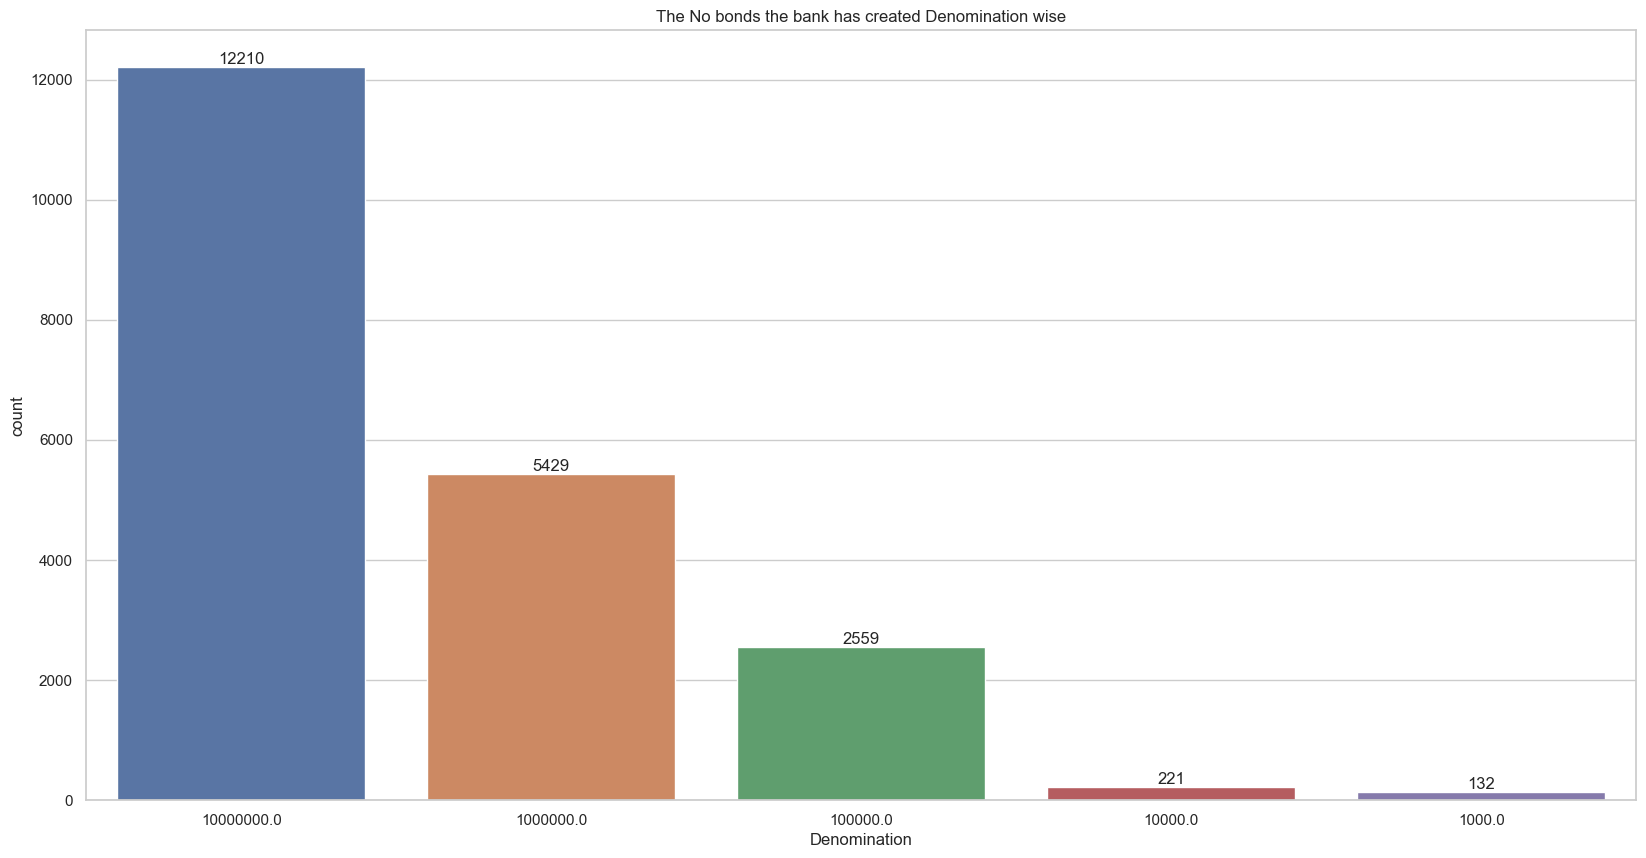

In [176]:
# Set the figure size
plt.figure(figsize=(20, 10))
# Calculate value counts of 'Denomination' and sort by descending order of counts
denomination_counts = alldata_df['Denomination'].value_counts().sort_values(ascending=False)
# Create the count plot with specified order and add count labels
ax = sns.countplot(data=alldata_df, x='Denomination', order=denomination_counts.index)
ax.bar_label(ax.containers[0])  # Add count labels to the bars
# title 
plt.title("The No bonds the bank has created Denomination wise")
# Show the plot
plt.show()

 --> This visualizations helps in understanding the distribution of bond denominations in the dataset
 
 --> in "alldata_df" the highest denominations is 10000000.0 ant the count is 12210 amd the lowest denominations is 1000.0 and the count is 132

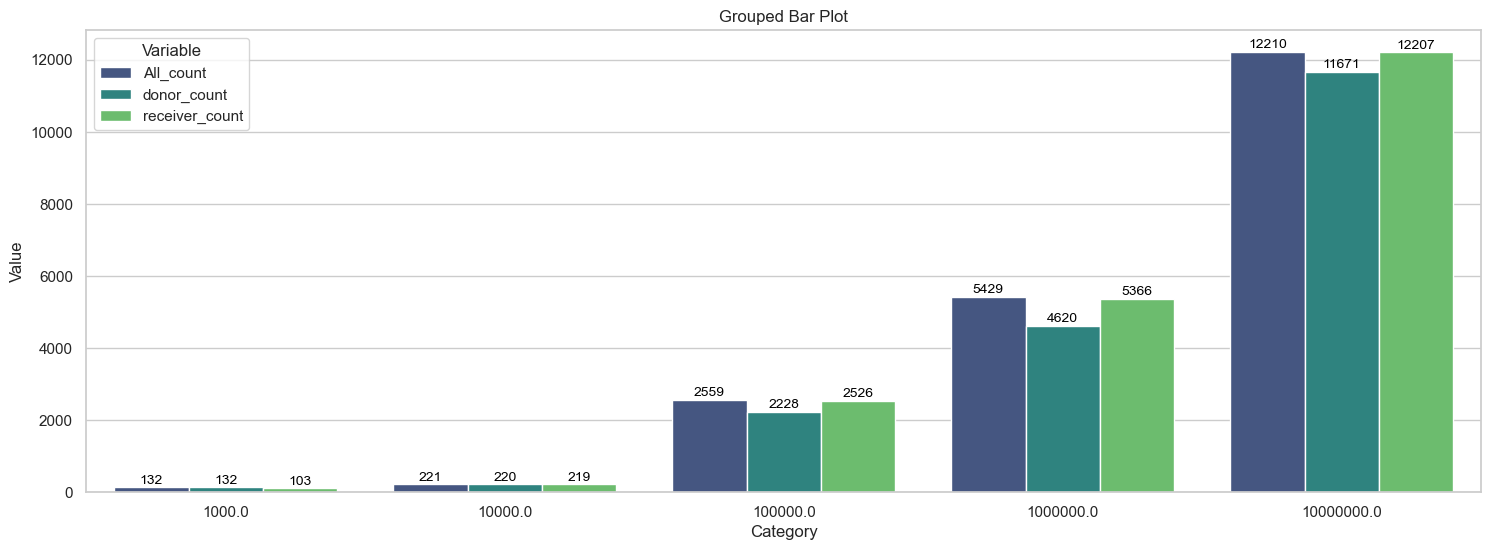

In [177]:
# Plotting
plt.figure(figsize=(18, 6))  # Set the figure size

# Melt the DataFrame to convert it to the long format
append_denominations_count_melted = append_denominations_count.reset_index().melt(id_vars='Denomination', 
                                                                                  var_name='Variable', 
                                                                                  value_name='Value')

# Create the grouped bar plot using Seaborn
ax = sns.barplot(x='Denomination', y='Value', hue='Variable', data=append_denominations_count_melted, palette='viridis')

# Adding numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Adding title and labels
plt.title('Grouped Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()

In [178]:
append_denominations_count = append_denominations_count.reset_index()
append_denominations_count

,Denomination,All_count,donor_count,receiver_count
0,10000000.0,12210,11671,12207
1,1000000.0,5429,4620,5366
2,100000.0,2559,2228,2526
3,10000.0,221,220,219
4,1000.0,132,132,103


In [179]:
append_denominations_count.columns

Index(['Denomination', 'All_count', 'donor_count', 'receiver_count'], dtype='object')

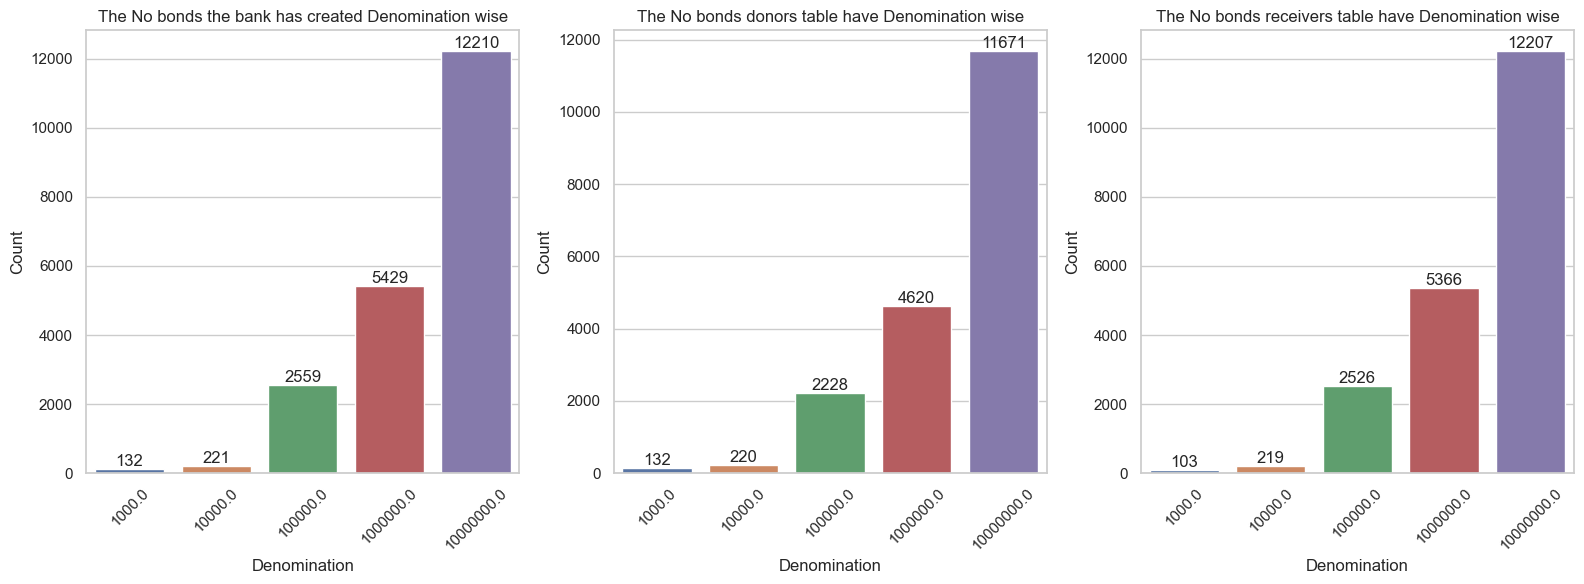

In [180]:
# Set the figure size (larger figure)
plt.figure(figsize=(16, 6))

# Plot the first count plot (leftmost)
plt.subplot(1, 3, 1)
sns.barplot(data=append_denominations_count, x='Denomination', y='All_count')
plt.title('First Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("The No bonds the bank has created Denomination wise")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the second count plot (middle)
plt.subplot(1, 3, 2)
sns.barplot(data=append_denominations_count, x='Denomination', y='donor_count')
plt.title('Second Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("The No bonds donors table have Denomination wise")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the third count plot (rightmost)
plt.subplot(1, 3, 3)
sns.barplot(data=append_denominations_count, x='Denomination', y='receiver_count')
plt.title('Third Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("The No bonds receivers table have Denomination wise")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Bond Prefix Count Distribution

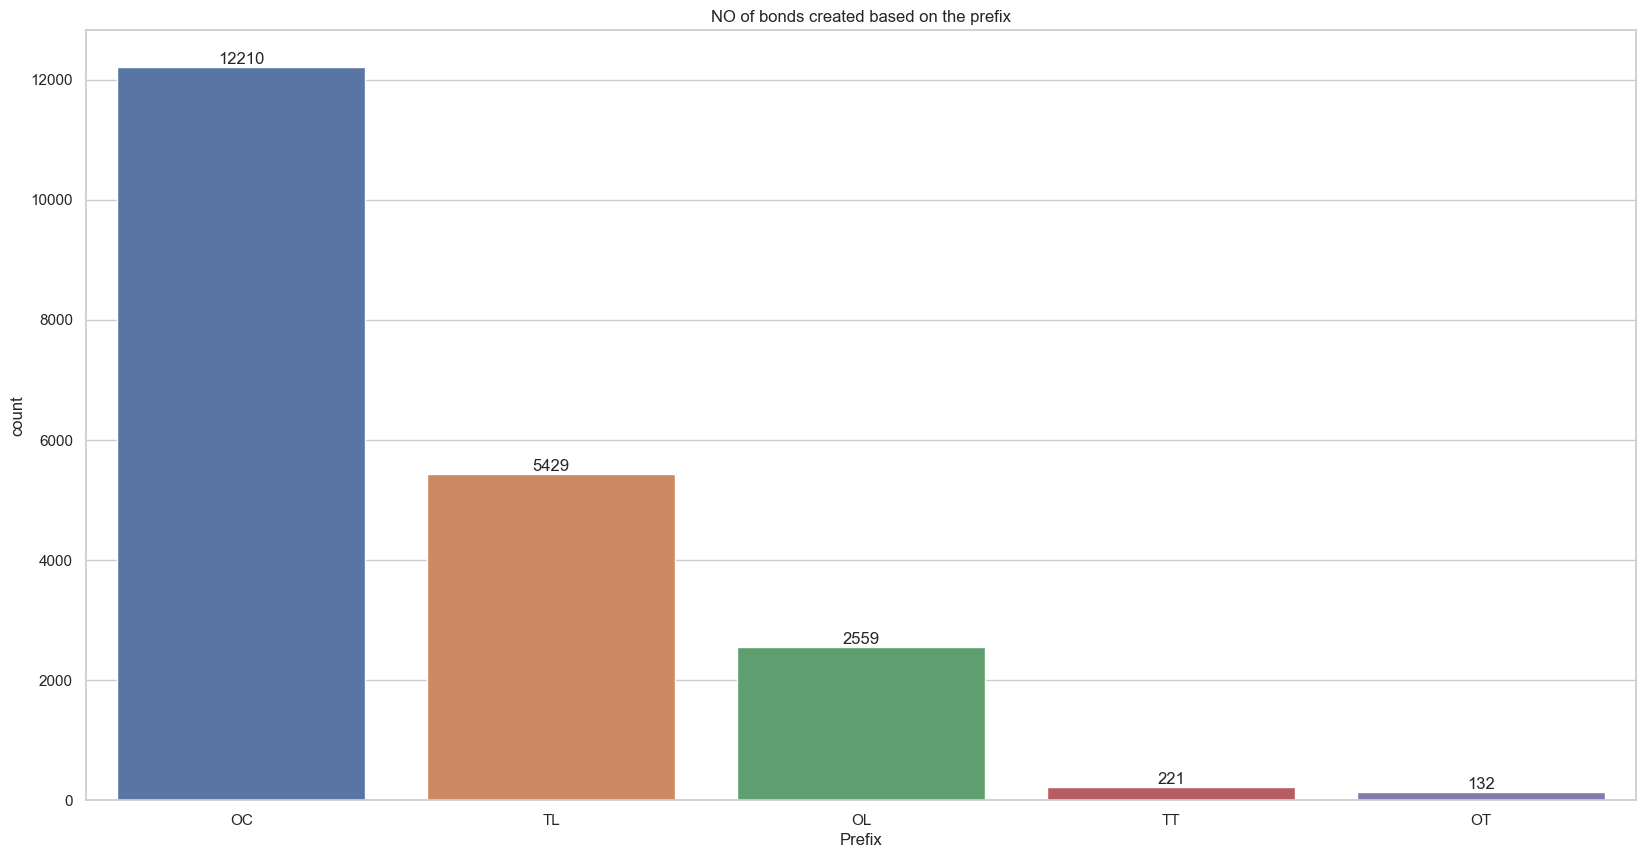

In [181]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot for 'Prefix'
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'Prefix' and sort by descending order of counts
prefix_counts = alldata_df['Prefix'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='Prefix', order=prefix_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
plt.title("NO of bonds created based on the prefix")
# Show the plot
plt.show()

In [186]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = alldata_df.groupby('IssueBranchcode')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch code')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Issue Branch Code')
plt.show()

KeyError: 'IssueBranchcode'